In [1]:
# Define IAM role
from sagemaker import get_execution_role
role = get_execution_role()

import Input_Config # Input Config - To be initialised
Input_Config.help()
bucket, W, x, y, vin_list, path, path2, path3, list_col, odo, ic = Input_Config._init_()

import Dummy_Config
Dummy_Config.help()
list_col = Dummy_Config._init_()

global bucket, W, x, y, vin_list, path, path2, path3, list_col, odo, ic

from d1 import path1cc, Tsim1, Tsim1pow
from statedwell import statedwell
from alertstat import alertstat
from d2 import s3_write
import Annotations
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

vinlist.csv not available
vin_list intialized with test list !!
bucket, W, x, y, vin_list, path, path2, path3, list_col, odo,ic
list_col


In [196]:
bucket="relai.poc.data"
folder_base='2/non-unified/'
file_extn='.csv'

from d2 import get_vin_list
f1=get_vin_list(bucket=bucket, folder_base=folder_base, file_extn=file_extn)  #reading source
#f2=get_vin_list(bucket=bucket, folder_base='res/1/', file_extn=file_extn)  #reading already done
#f3= list( set(f1)-set(f2) ) # picking the remaining to do
#f4=get_vin_list(bucket=bucket, folder_base='jcd/', file_extn=file_extn)  #reading source
#f5=list(pd.read_excel('s3://{}/{}{}'.format(bucket,'0tmp/','vin_239.xlsx'))['vin'])
#f6=f4+f5[0:40]
#path = 's3://{}/{}/{}.csv'.format(bucket,folder_base,vin)
#'s3://{}/{}{}.csv'.format(bucket,'alert/',vin)
list_col_nov = ['ENGINE_SPEED_x', 'EFF_TORQUE', 'power', 'EVENT_UTC1', 
       'AIR_PRESSURE_DIGITAL', 'VEHICAL_BATTERY_POTENTIAL',
       'FUEL_LEVEL', 'ENG_OIL_ACTUAL', 'ENG_COOLANT_TEMP', 'FUEL_CONSUM',
       'IGNITION_STATUS',
       'AIR_PRESSURE_ACTUAL1', 'AIR_PRESSURE_ACTUAL2',
       'odo', 'ENGINE_HRS']

Radiator_List = ['RADIATOR CORE', 'RADIATOR DAT', 'THERMOSTAT ASSY', 'RADIATOR OTHER FAILURES', 'COOLANT TEMPERATURE SENSOR', 'TEMPERATURE SENSOR', 'ENGINE FAN  VISCOUS','REMOTE FAN DRIVE']

In [17]:
A=set()
for i in range(0,len(f1)):
    A.add(f1[i].split('/')[0])

In [26]:
f1A=dict()
for j in list(A)[0:]:
    f1A[j]=get_vin_list(bucket=bucket, folder_base=folder_base+j+'/', file_extn=file_extn)

In [209]:
df1_dict=dict()
c=0
for vin in list(A)[0:]:
    tmp=[]
    for keyparts in f1A[vin]:
        path = 's3://{}/{}{}/{}.csv'.format(bucket,folder_base,vin,keyparts)
        c+=1
        print(c)
        tmp.append(pd.read_csv(path))
    try: df1_dict[vin]=(pd.concat(tmp, axis=0)[list_col_nov])
    except: pass

1
2
3
4
5
6
7
8
9
10
11
12


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:10: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360
361
362
363
364
365
366
367
368
369
370
371
372
373
374
375
376
377
378
379
380
381
382
383
384
385
386
387
388
389
390
391
392
393
394
395
396
397
398
399
400
401
402
403
404
405
406
407
408
409
410
411
412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572


In [215]:
c=0
for i in list(f1A.keys()):
    c=c+len(f1A[i])  

# c = 1509
# len(list(A)) = 390 vins
# df vins = 128


In [234]:
c1=[]
for vin in list(df1_dict.keys())[0:]:
    df_radtmp = df_jcd[ (df_jcd['Equipment']==vin) &  (df_jcd['Service Complaint Co.1'].isin(Radiator_List) ) ] [['Measurement in KM','Service Complaint Co.1']].drop_duplicates()['Service Complaint Co.1']           
    #if (df_radtmp.shape[0]>0): c1 = c1+1
    c1.append(df_radtmp)

In [236]:
dd1=pd.concat(c1, axis=0)
dd1.value_counts()

THERMOSTAT ASSY               89
RADIATOR CORE                 32
ENGINE FAN  VISCOUS           22
RADIATOR DAT                   6
COOLANT TEMPERATURE SENSOR     5
RADIATOR OTHER FAILURES        1
Name: Service Complaint Co.1, dtype: int64

In [58]:
bucket="relai.poc.data"
folder_base='3/'
file_extn='.csv'

from d2 import get_vin_list
f3=get_vin_list(bucket=bucket, folder_base=folder_base, file_extn=file_extn)  #reading source
tmp=[]
for j in f3:
    path3 = 's3://{}/{}{}.csv'.format(bucket,folder_base,j)
    tmp.append(pd.read_csv(path3))
    df_alert= pd.concat(tmp, axis=0)

In [63]:
B=set(df_alert['vin'].unique())

In [110]:
#(df_alert[['vin', 'obu_pk_id']].drop_duplicates())['vin'].value_counts()

In [101]:
df_alert[df_alert['vin']=='VIN212158'][['vin', 'obu_pk_id']].drop_duplicates()

,vin,obu_pk_id
262137,VIN212158,NI016611
262138,VIN212158,NI031747


In [146]:
df1_dict[list(df1_dict.keys())[4]]

'NA'

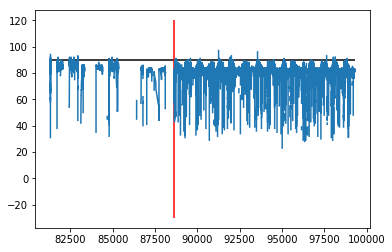

In [218]:
import seaborn as sns
import matplotlib.pyplot as plt
vin=list(df1_dict.keys())[7]
plt.plot(df1_dict[vin]['odo'],df1_dict[vin]['ENG_COOLANT_TEMP'])
plt.hlines(90, df1_dict[vin]['odo'].min(), df1_dict[vin]['odo'].max())
plt.vlines(df_jcd[ (df_jcd['Equipment']==vin) &  (df_jcd['Service Complaint Co.1'].isin(Radiator_List) ) ] [['Measurement in KM','Service Complaint Co.1']].drop_duplicates()['Measurement in KM']
           , -30, 120, color='red')

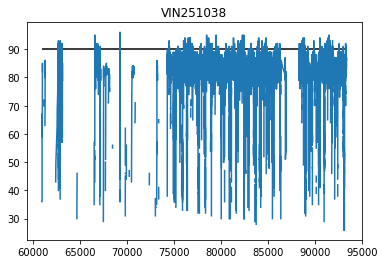

<Figure size 432x288 with 0 Axes>

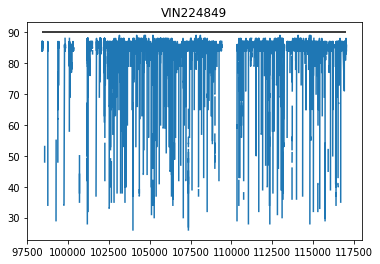

<Figure size 432x288 with 0 Axes>

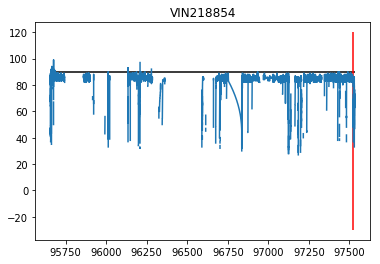

<Figure size 432x288 with 0 Axes>

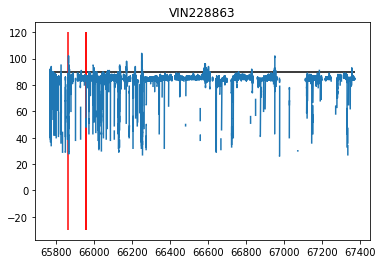

<Figure size 432x288 with 0 Axes>

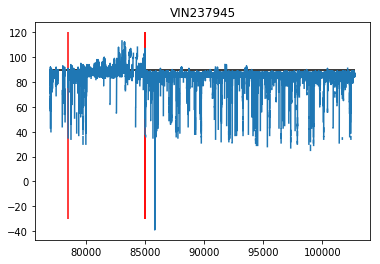

<Figure size 432x288 with 0 Axes>

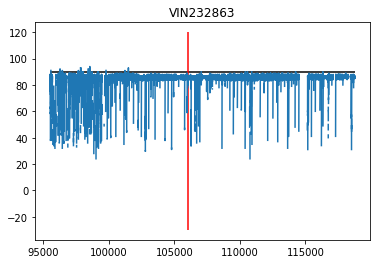

<Figure size 432x288 with 0 Axes>

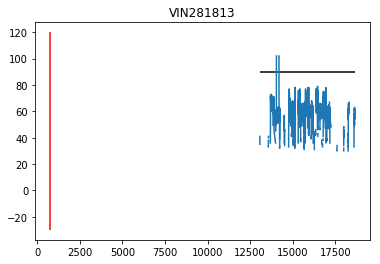

<Figure size 432x288 with 0 Axes>

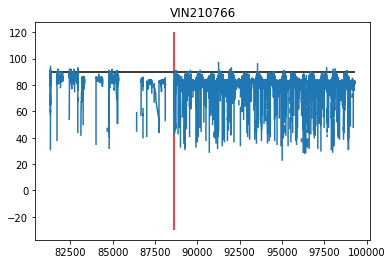

<Figure size 432x288 with 0 Axes>

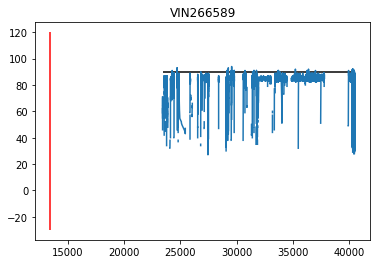

<Figure size 432x288 with 0 Axes>

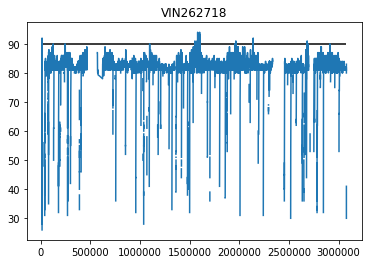

<Figure size 432x288 with 0 Axes>

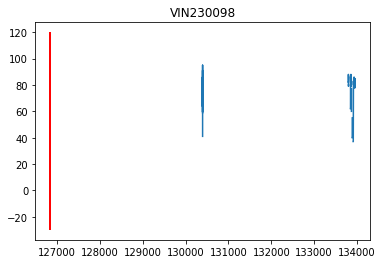

<Figure size 432x288 with 0 Axes>

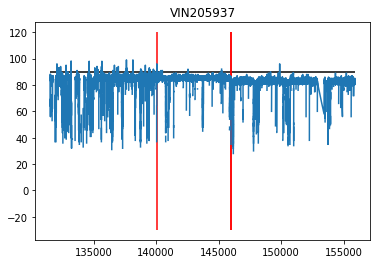

<Figure size 432x288 with 0 Axes>

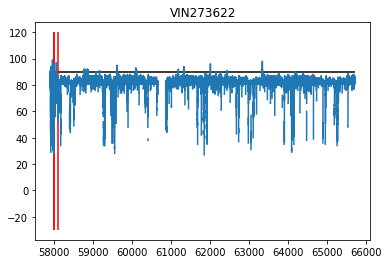

<Figure size 432x288 with 0 Axes>

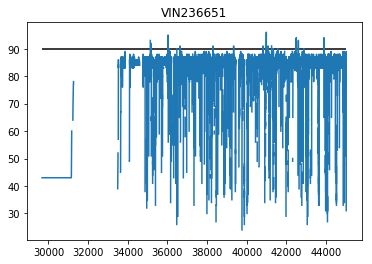

<Figure size 432x288 with 0 Axes>

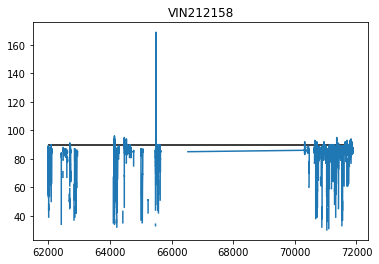

<Figure size 432x288 with 0 Axes>

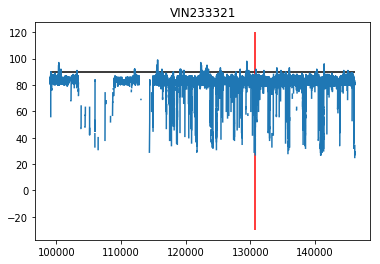

<Figure size 432x288 with 0 Axes>

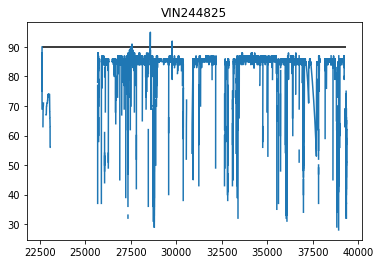

<Figure size 432x288 with 0 Axes>

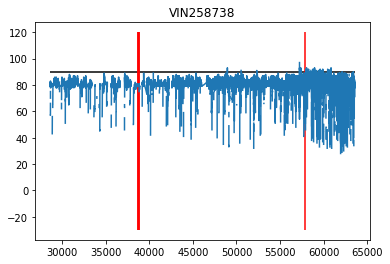

<Figure size 432x288 with 0 Axes>

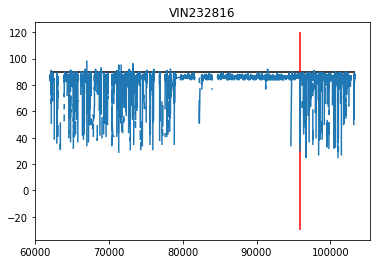

<Figure size 432x288 with 0 Axes>

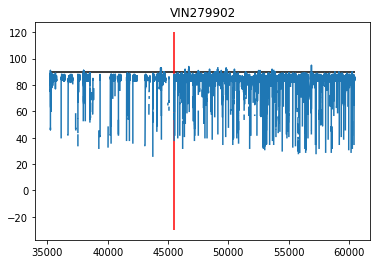

<Figure size 432x288 with 0 Axes>

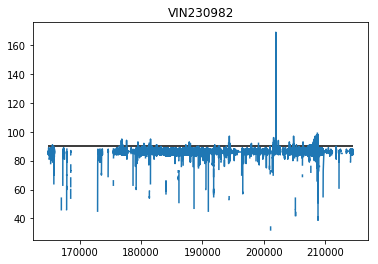

<Figure size 432x288 with 0 Axes>

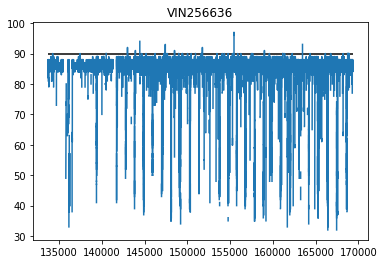

<Figure size 432x288 with 0 Axes>

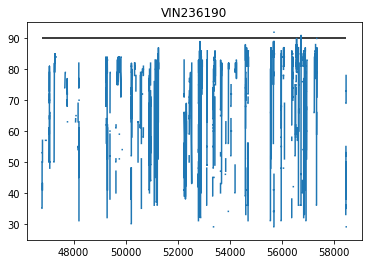

<Figure size 432x288 with 0 Axes>

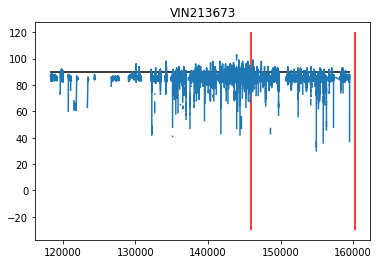

<Figure size 432x288 with 0 Axes>

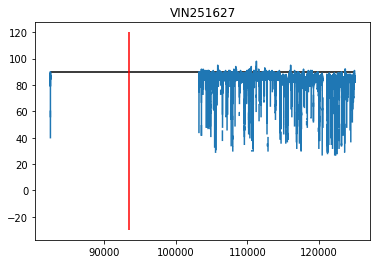

<Figure size 432x288 with 0 Axes>

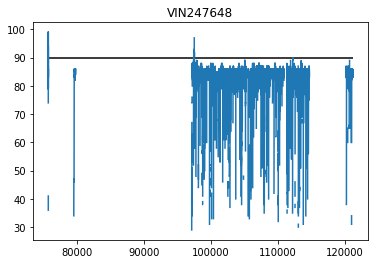

<Figure size 432x288 with 0 Axes>

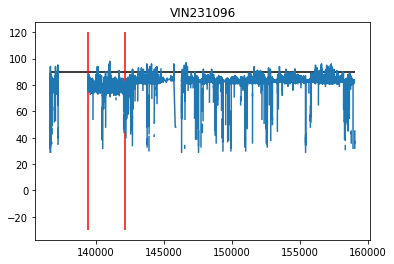

<Figure size 432x288 with 0 Axes>

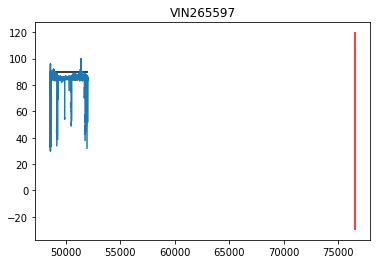

<Figure size 432x288 with 0 Axes>

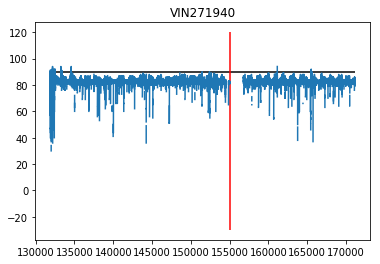

<Figure size 432x288 with 0 Axes>

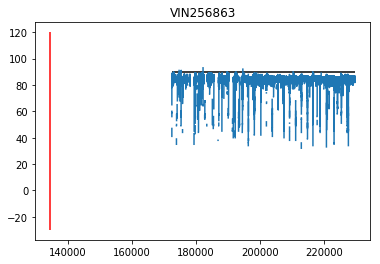

<Figure size 432x288 with 0 Axes>

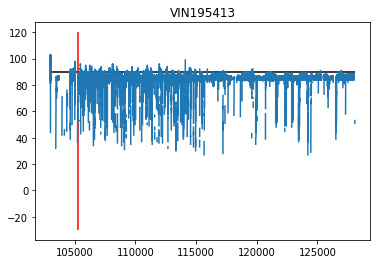

<Figure size 432x288 with 0 Axes>

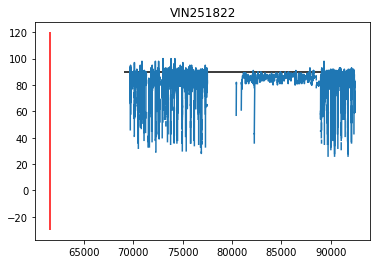

<Figure size 432x288 with 0 Axes>

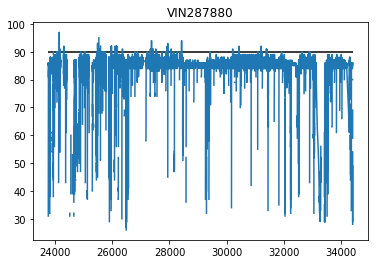

<Figure size 432x288 with 0 Axes>

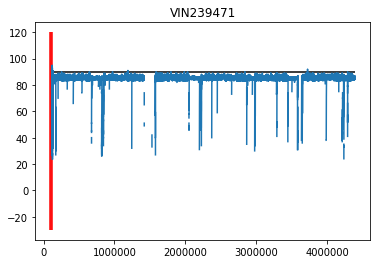

<Figure size 432x288 with 0 Axes>

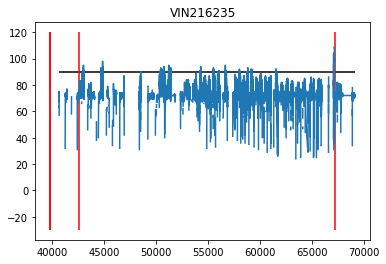

<Figure size 432x288 with 0 Axes>

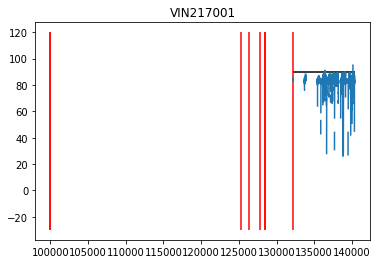

<Figure size 432x288 with 0 Axes>

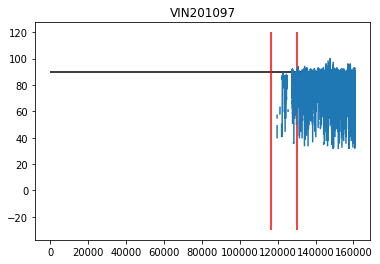

<Figure size 432x288 with 0 Axes>

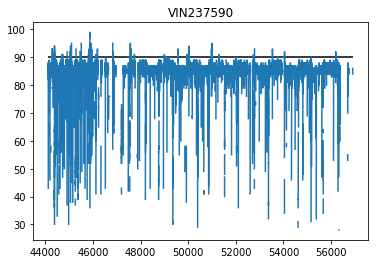

<Figure size 432x288 with 0 Axes>

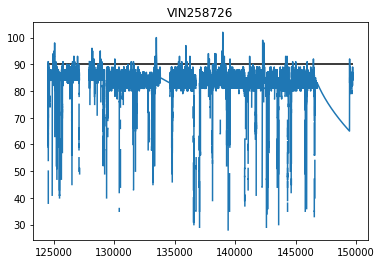

<Figure size 432x288 with 0 Axes>

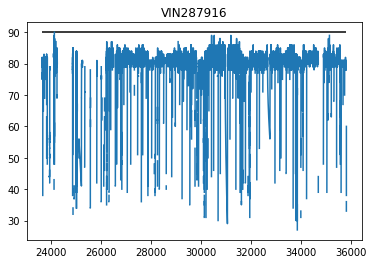

<Figure size 432x288 with 0 Axes>

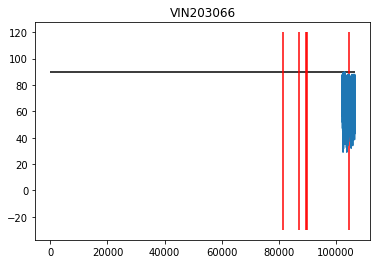

<Figure size 432x288 with 0 Axes>

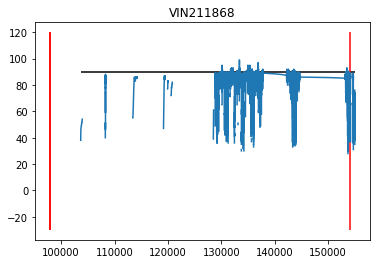

<Figure size 432x288 with 0 Axes>

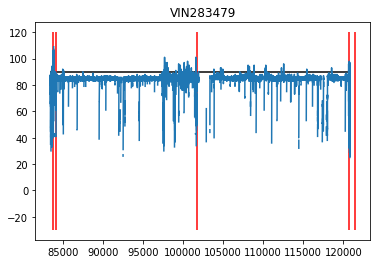

<Figure size 432x288 with 0 Axes>

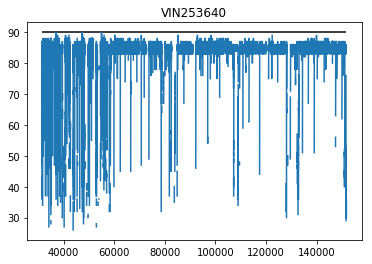

<Figure size 432x288 with 0 Axes>

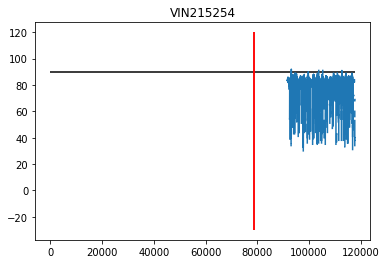

<Figure size 432x288 with 0 Axes>

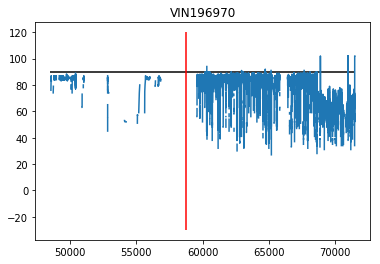

<Figure size 432x288 with 0 Axes>

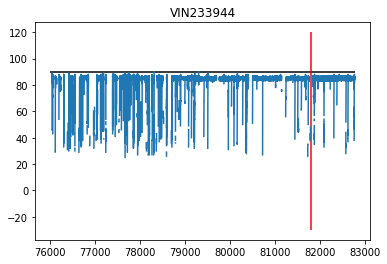

<Figure size 432x288 with 0 Axes>

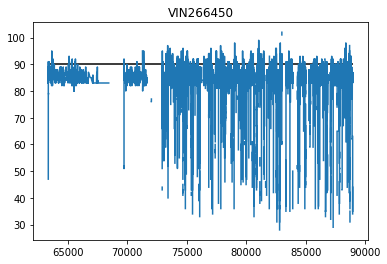

<Figure size 432x288 with 0 Axes>

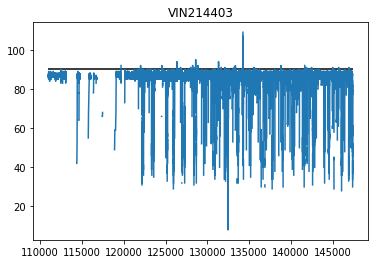

<Figure size 432x288 with 0 Axes>

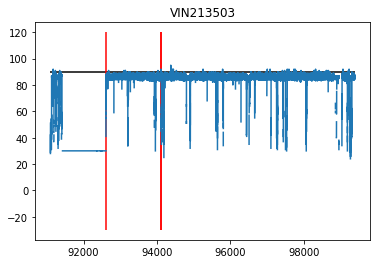

<Figure size 432x288 with 0 Axes>

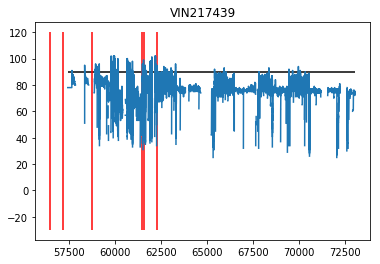

<Figure size 432x288 with 0 Axes>

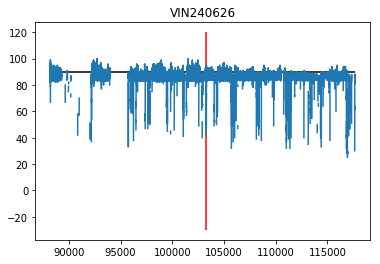

<Figure size 432x288 with 0 Axes>

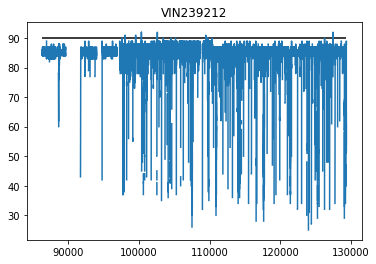

<Figure size 432x288 with 0 Axes>

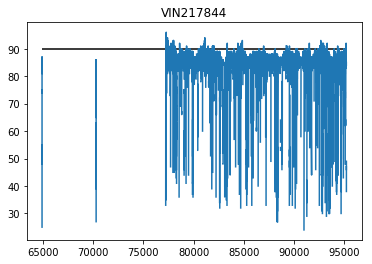

<Figure size 432x288 with 0 Axes>

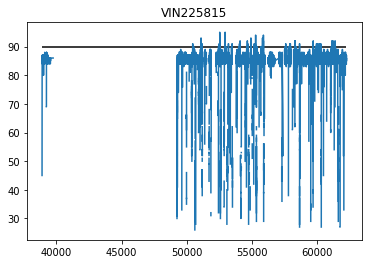

<Figure size 432x288 with 0 Axes>

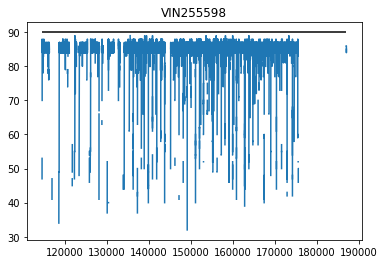

<Figure size 432x288 with 0 Axes>

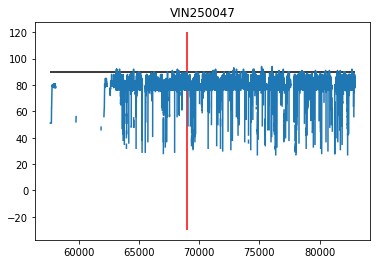

<Figure size 432x288 with 0 Axes>

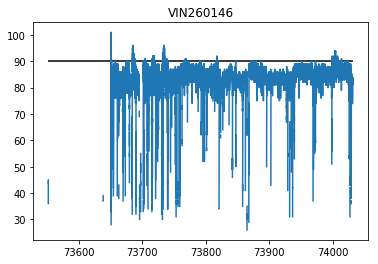

<Figure size 432x288 with 0 Axes>

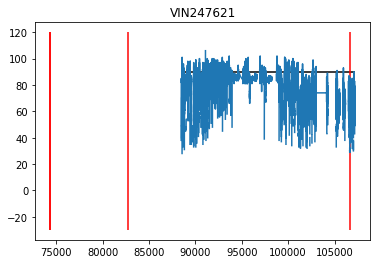

<Figure size 432x288 with 0 Axes>

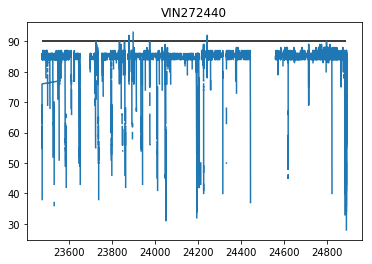

<Figure size 432x288 with 0 Axes>

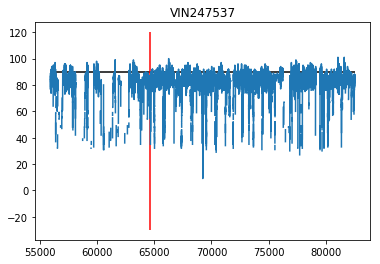

<Figure size 432x288 with 0 Axes>

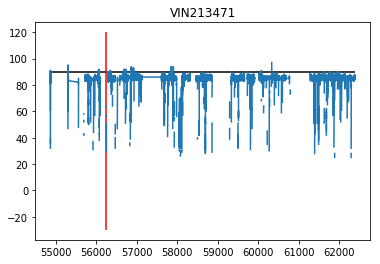

<Figure size 432x288 with 0 Axes>

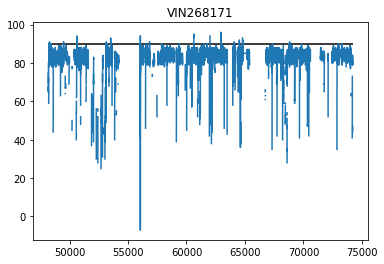

<Figure size 432x288 with 0 Axes>

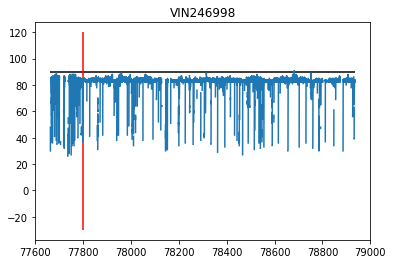

<Figure size 432x288 with 0 Axes>

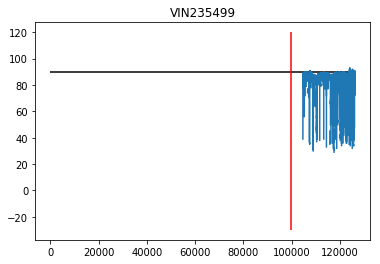

<Figure size 432x288 with 0 Axes>

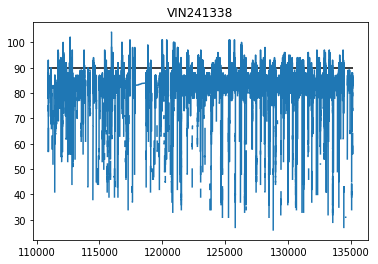

<Figure size 432x288 with 0 Axes>

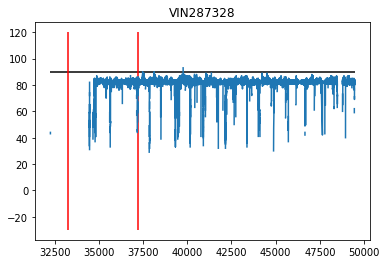

<Figure size 432x288 with 0 Axes>

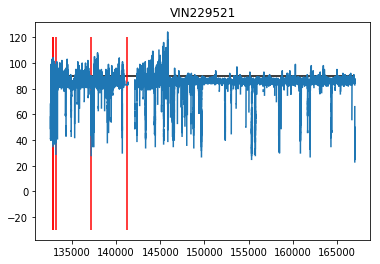

<Figure size 432x288 with 0 Axes>

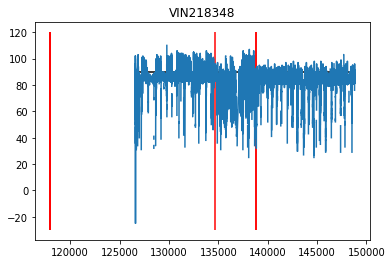

<Figure size 432x288 with 0 Axes>

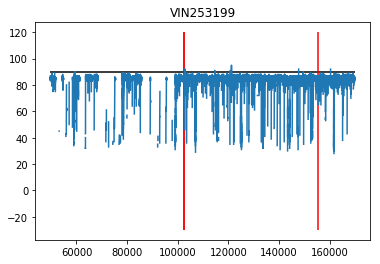

<Figure size 432x288 with 0 Axes>

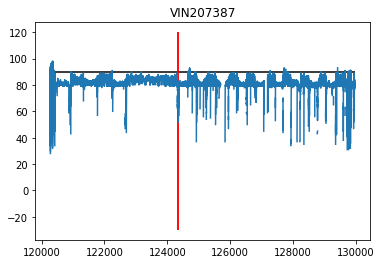

<Figure size 432x288 with 0 Axes>

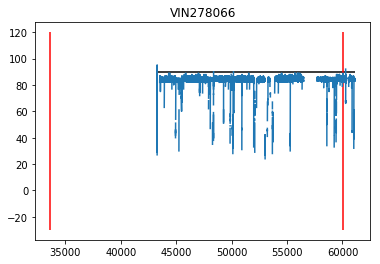

<Figure size 432x288 with 0 Axes>

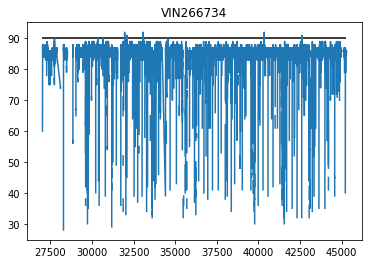

<Figure size 432x288 with 0 Axes>

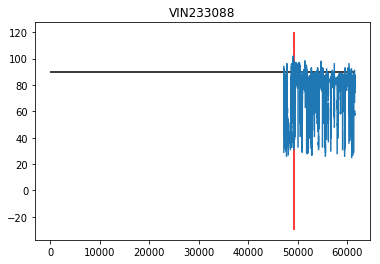

<Figure size 432x288 with 0 Axes>

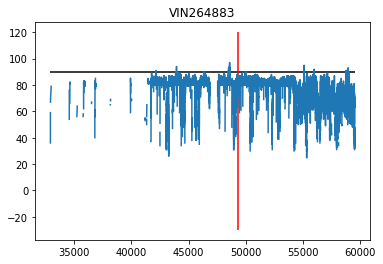

<Figure size 432x288 with 0 Axes>

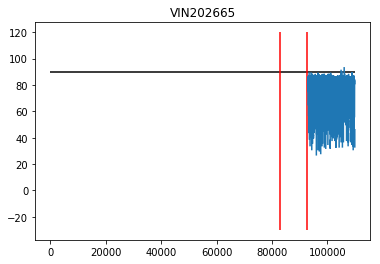

<Figure size 432x288 with 0 Axes>

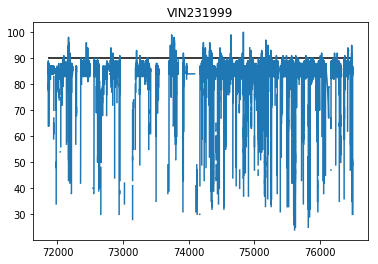

<Figure size 432x288 with 0 Axes>

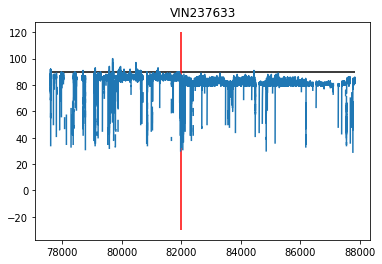

<Figure size 432x288 with 0 Axes>

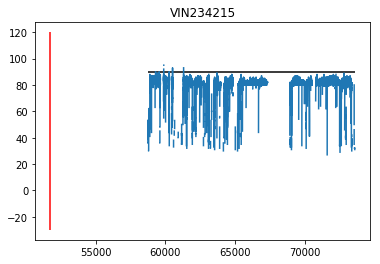

<Figure size 432x288 with 0 Axes>

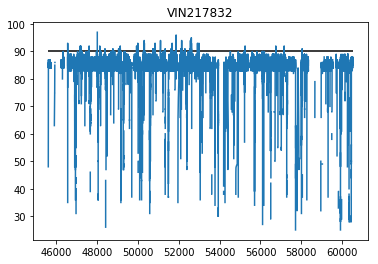

<Figure size 432x288 with 0 Axes>

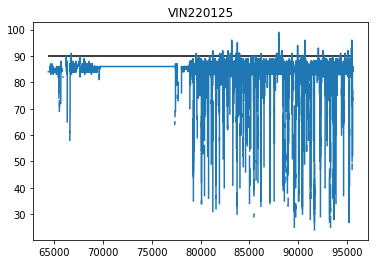

<Figure size 432x288 with 0 Axes>

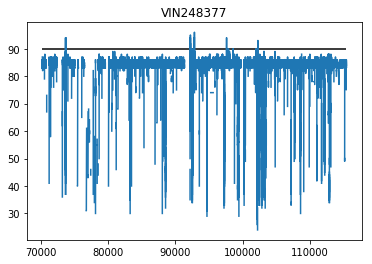

<Figure size 432x288 with 0 Axes>

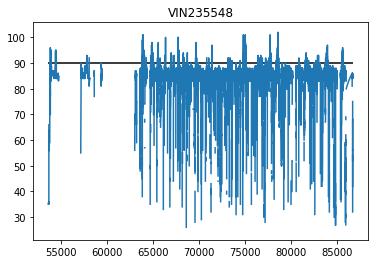

<Figure size 432x288 with 0 Axes>

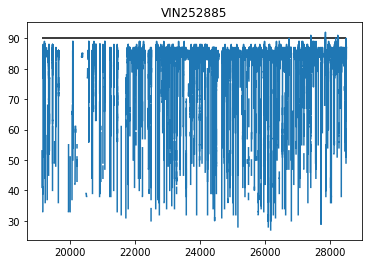

<Figure size 432x288 with 0 Axes>

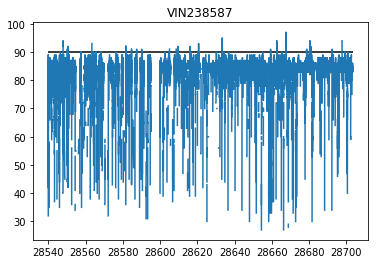

<Figure size 432x288 with 0 Axes>

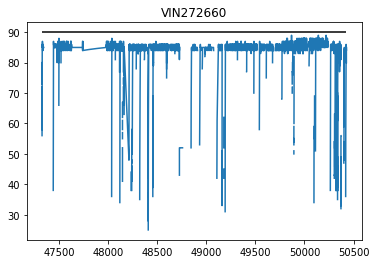

<Figure size 432x288 with 0 Axes>

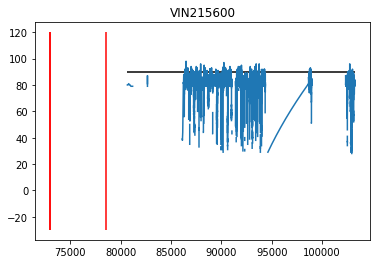

<Figure size 432x288 with 0 Axes>

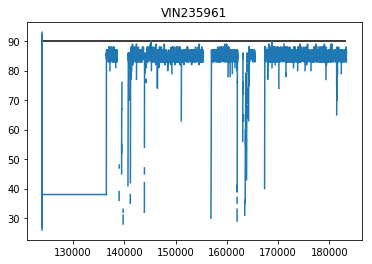

<Figure size 432x288 with 0 Axes>

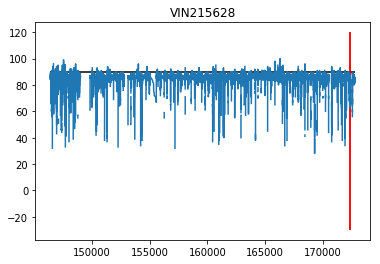

<Figure size 432x288 with 0 Axes>

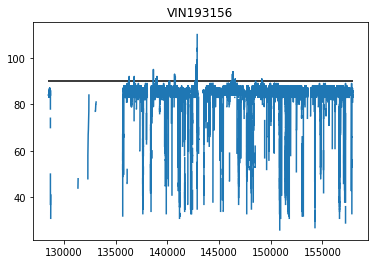

<Figure size 432x288 with 0 Axes>

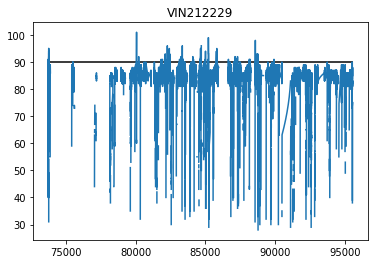

<Figure size 432x288 with 0 Axes>

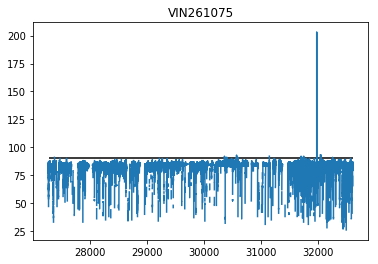

<Figure size 432x288 with 0 Axes>

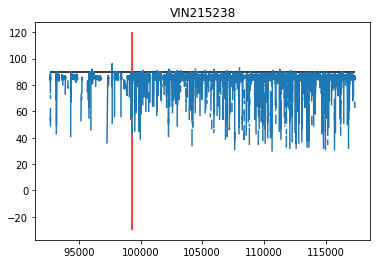

<Figure size 432x288 with 0 Axes>

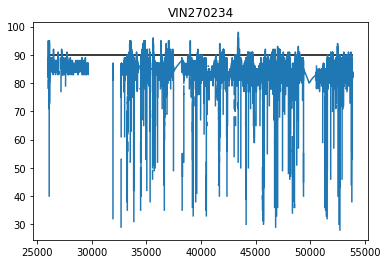

<Figure size 432x288 with 0 Axes>

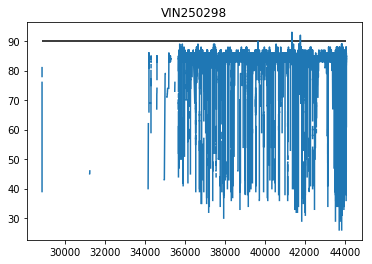

<Figure size 432x288 with 0 Axes>

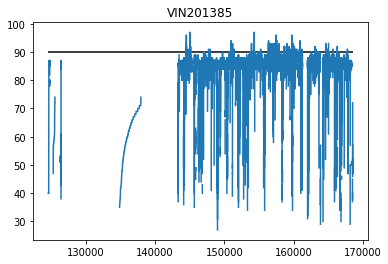

<Figure size 432x288 with 0 Axes>

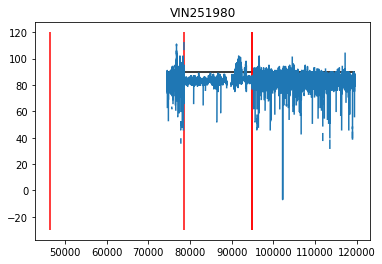

<Figure size 432x288 with 0 Axes>

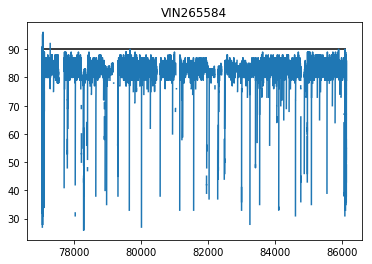

<Figure size 432x288 with 0 Axes>

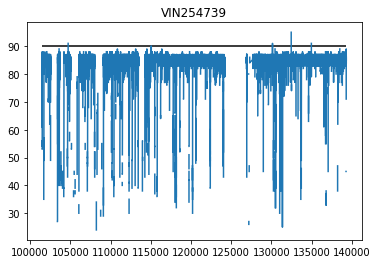

<Figure size 432x288 with 0 Axes>

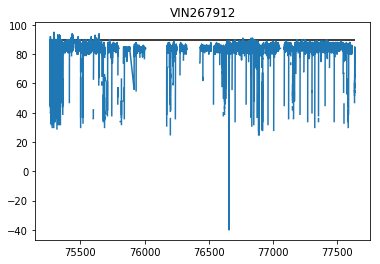

<Figure size 432x288 with 0 Axes>

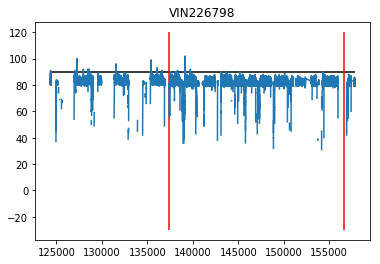

<Figure size 432x288 with 0 Axes>

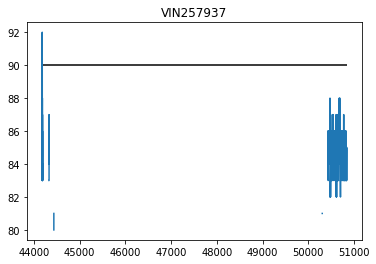

<Figure size 432x288 with 0 Axes>

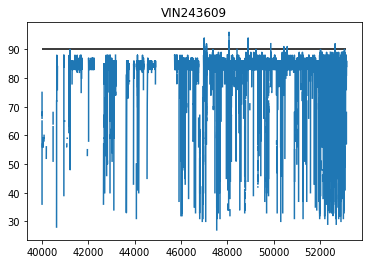

<Figure size 432x288 with 0 Axes>

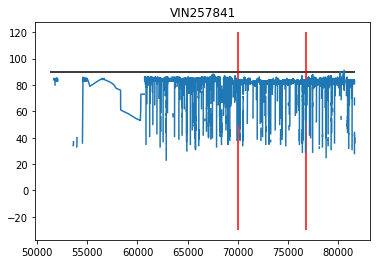

<Figure size 432x288 with 0 Axes>

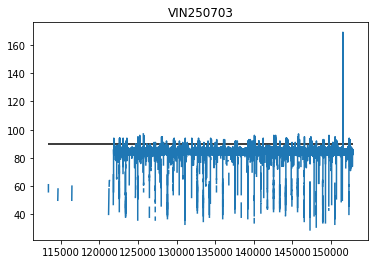

<Figure size 432x288 with 0 Axes>

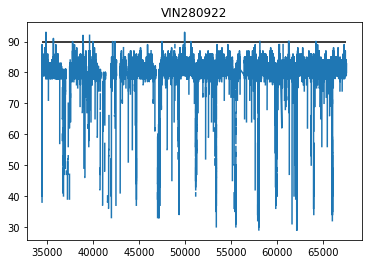

<Figure size 432x288 with 0 Axes>

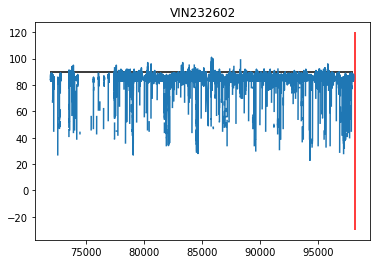

<Figure size 432x288 with 0 Axes>

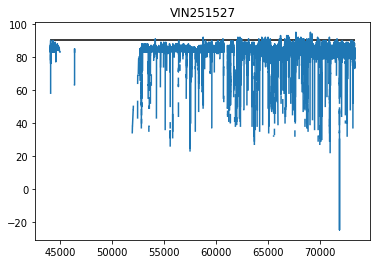

<Figure size 432x288 with 0 Axes>

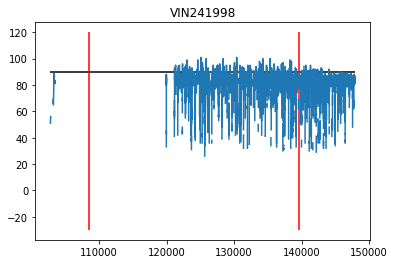

<Figure size 432x288 with 0 Axes>

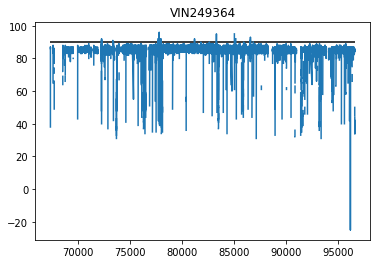

<Figure size 432x288 with 0 Axes>

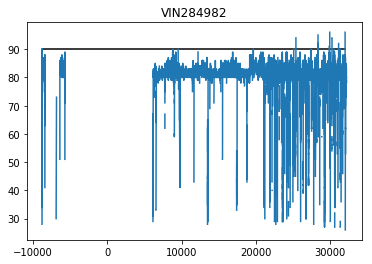

<Figure size 432x288 with 0 Axes>

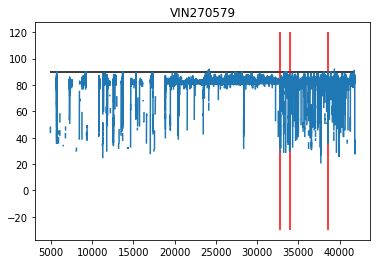

<Figure size 432x288 with 0 Axes>

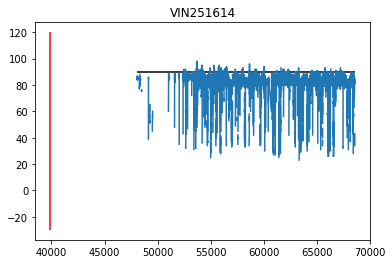

<Figure size 432x288 with 0 Axes>

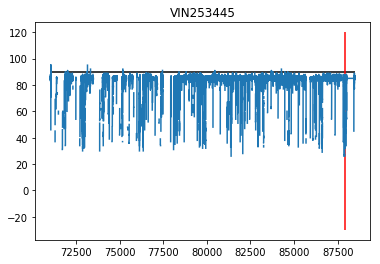

<Figure size 432x288 with 0 Axes>

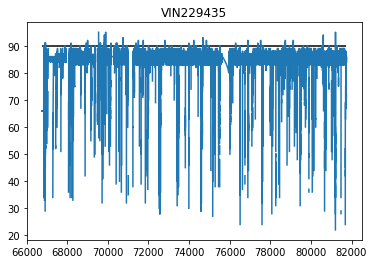

<Figure size 432x288 with 0 Axes>

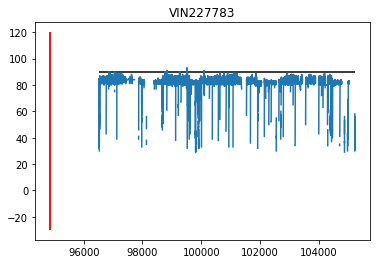

<Figure size 432x288 with 0 Axes>

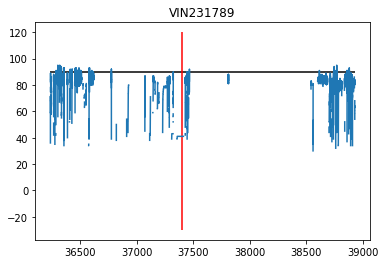

<Figure size 432x288 with 0 Axes>

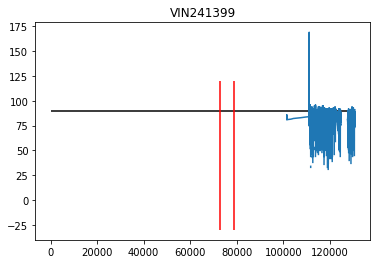

<Figure size 432x288 with 0 Axes>

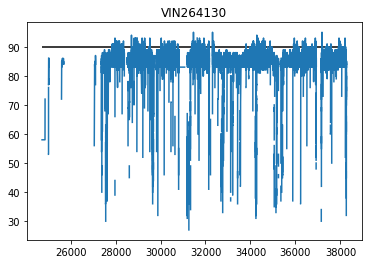

<Figure size 432x288 with 0 Axes>

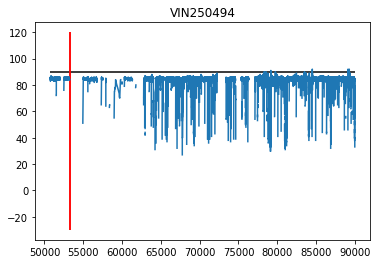

<Figure size 432x288 with 0 Axes>

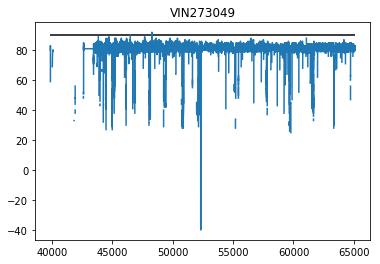

<Figure size 432x288 with 0 Axes>

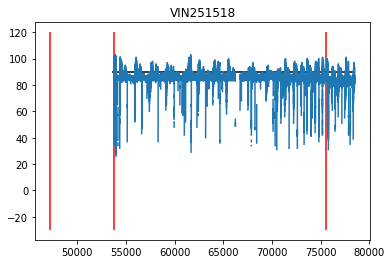

<Figure size 432x288 with 0 Axes>

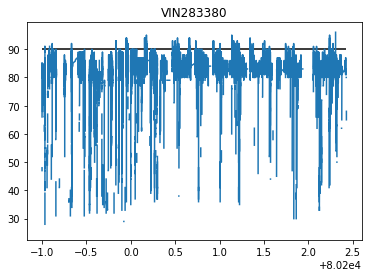

<Figure size 432x288 with 0 Axes>

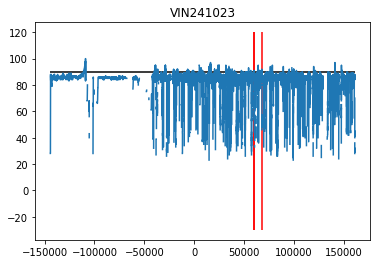

<Figure size 432x288 with 0 Axes>

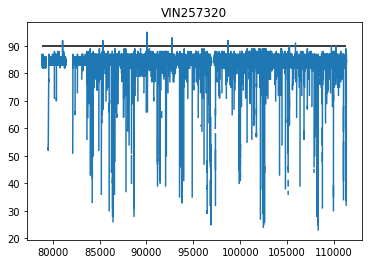

<Figure size 432x288 with 0 Axes>

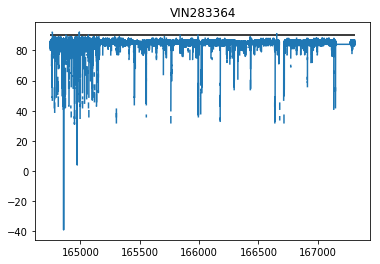

<Figure size 432x288 with 0 Axes>

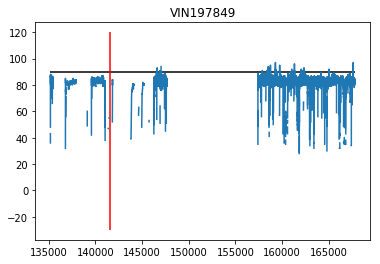

<Figure size 432x288 with 0 Axes>

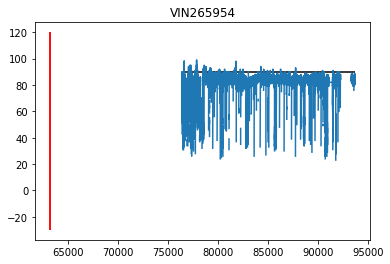

<Figure size 432x288 with 0 Axes>

In [239]:
for vin in list(df1_dict.keys()):
    plt.figure()
    plt.plot(df1_dict[vin]['odo'],df1_dict[vin]['ENG_COOLANT_TEMP'])
    plt.hlines(90, df1_dict[vin]['odo'].min(), df1_dict[vin]['odo'].max())
    plt.vlines(df_jcd[ (df_jcd['Equipment']==vin) &  (df_jcd['Service Complaint Co.1'].isin(Radiator_List) ) ] [['Measurement in KM','Service Complaint Co.1']].drop_duplicates()['Measurement in KM']
           , -30, 120, color='red')
    plt.title(vin)
    plt.show()
    plt.clf()

In [156]:
def get_df_jcd(year=2019):
    bucket="relai.poc.data"
    folder_base='1/{}/'.format(year)
    file_extn='.csv'
    j1=get_vin_list(bucket=bucket, folder_base=folder_base, file_extn=file_extn)
    tmp=[]
    for i in j1:
        path_jcd= 's3://{}/{}{}.csv'.format(bucket,folder_base,i)
        tmp.append(pd.read_csv(path_jcd))
    df_jcd = pd.concat(tmp, axis=0)
    return df_jcd

#df_jcd = get_df_jcd()

In [205]:
df_jcd[ (df_jcd['Equipment']==vin) & 
        (df_jcd['Service Complaint Co.1'].isin( ['RADIATOR CORE', 'RADIATOR DAT', 'THERMOSTAT ASSY', 'RADIATOR OTHER FAILURES',
                                                 'COOLANT TEMPERATURE SENSOR', 'TEMPERATURE SENSOR', 'ENGINE FAN  VISCOUS','REMOTE FAN DRIVE'])
        ) ]    [['Measurement in KM','Service Complaint Co.1']].drop_duplicates()

,Measurement in KM,Service Complaint Co.1


In [242]:
df1_dict['VIN251038'].head()

,ENGINE_SPEED_x,EFF_TORQUE,power,EVENT_UTC1,AIR_PRESSURE_DIGITAL,VEHICAL_BATTERY_POTENTIAL,FUEL_LEVEL,ENG_OIL_ACTUAL,ENG_COOLANT_TEMP,FUEL_CONSUM,IGNITION_STATUS,AIR_PRESSURE_ACTUAL1,AIR_PRESSURE_ACTUAL2,odo,ENGINE_HRS
0,601.0,3.0,188.809718,2019-04-22 05:41:09,1.0,27.25,407.48,540.0,36.0,18509.5,1.0,NaN,NaN,60952.027243,2220.5
1,601.0,2.0,125.873146,2019-04-22 05:41:39,1.0,27.25,407.48,540.0,36.0,18509.5,1.0,NaN,NaN,60952.054194,2220.5
2,1432.0,27.0,4048.884612,2019-04-22 05:42:09,1.0,27.25,407.48,540.0,36.0,18509.5,1.0,NaN,NaN,60952.080855,2220.5
3,1355.0,36.0,5108.229655,2019-04-22 05:42:39,1.0,27.30,407.48,508.0,40.0,18509.5,1.0,NaN,NaN,60952.107225,2220.5
4,667.0,0.0,0.000000,2019-04-22 05:43:09,1.0,27.28,407.48,504.0,43.0,18509.5,1.0,NaN,NaN,60952.133303,2220.5


In [ ]:
# xy_data_list = []
file_counter=0
for vin in list(df1_dict.keys())[0:3]:
    file_counter+=1

    df1_p = df1_dict[vin]
    df1_p['ENGINE_SPEED'] = df1_p['ENGINE_SPEED_x']

    df3r=statedwell(W, df1_p)
    df1 = df1_p[df1_p['ENGINE_SPEED_x']>0]
        
    df1_c = df_alert[df_alert['vin']==vin] # (file_alert)       
    if (df1_c.shape[0]>0): df_temp0=alertstat(W, df1_p, df1_c)
    else : df_temp0=pd.DataFrame()
    
    from d2 import power
    df1 = power(df1)
    
    ldf=[]
    for i in list_col:
        if(i in ['power[-inf,0]','power[0,25]','power[25,75]','power[75,inf]']):
            df10 = Tsim1pow(P1=df1[i],odo=df1['odo'], P_name=i)
            ldf.append(df10)#.to_csv(i+".csv")
        else:
            df10 = Tsim1(P1=df1[i],odo=df1['odo'], P_name=i)
            ldf.append(df10)#.to_csv(i+".csv")
    
            
    if (df3r.shape[0]>0):
        if (df_temp0.shape[0]>0):
            df3r=pd.concat([df3r,df_temp0], axis=1)#, sort=False
        
    df_temp1=pd.concat(ldf, axis=1)#, sort=False
    df_temp2=pd.concat([df3r,df_temp1], axis=1)#, sort=False
    
    #----- Annotations ----- # skip-POC- Nirumal & Aseena taking care of populating display
    '''  
    col_L2_sys = Input_Config.col_L2_sys # name of column in jcd having L2-sys components
    if (df_temp2.shape[0]>0): 
        df_temp2=Annotations.Annotations_egr(df_temp2, col_L2_sys, path+'/1', vin) 
        xy_data_list.append(df_temp2)
        _=s3_write(bucket, 'res/1/{}.csv'.format(vin), df_temp2)
    '''
    _=s3_write(bucket, 'res/1/{}.csv'.format(vin), df_temp2)
    
    df_temp2['vin']=vin
    xy_data_list.append(df_temp2)
    # ---- end of vin-wise ----
    
df_temp3=pd.concat(xy_data_list, axis=0)
_=s3_write(bucket, 'res/2/batch_{}.csv'.format('POC_EGR_batch'), df_temp3)
#-------------------------

#from fsa import anova, pca, tsne

# Anova - F>1 : of df_temp3: box plots
# PCA of (# F>1) : scatterplots
# tsne - of concat(x_data_list) : scatterplots
# tsne - of (# F>1) : scatterplots
#--------------------------------

# import prediction_model as pm



